In [45]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

from quantization_utils import (
    n1, n2, b1, b2, half_range_b2, half_range, generate_data, interval_based_quantize, interval_based_quantize_dequantize,
    interval_based_quantize_eachprint, interval_based_quantize_map, 
    dynamic_quantize_level_reduce, dynamic_quantize_level_reduce_dequantize, map_to_target_range
)

from distribution import (
    generate_single_peak_data, generate_double_peak_data,
    generate_uniform_data, generate_exponential_data,
    generate_multi_peak_data, generate_triangular_data,
    generate_poisson_data, generate_extreme_values_data,
    generate_gaussian_with_uniform_noise
)

Text(0, 0.5, 'Frequency')

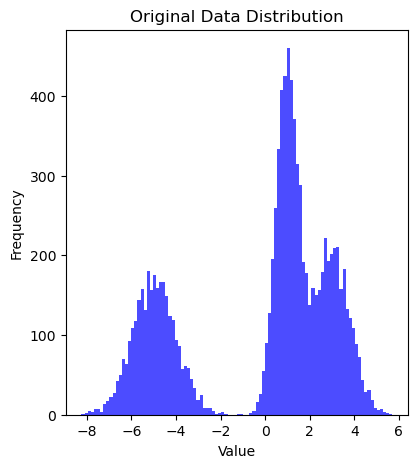

In [46]:
# 主程序
data = generate_data()  # 生成数据
#data = generate_uniform_data()  # 生成均匀分布数据

# 画图
plt.figure(figsize=(15, 5))  # 画布总的大小
# 先画原始数据分布图
plt.subplot(1, 3, 1)
plt.hist(data.numpy(), bins=100, color='blue', alpha=0.7)
plt.title("Original Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

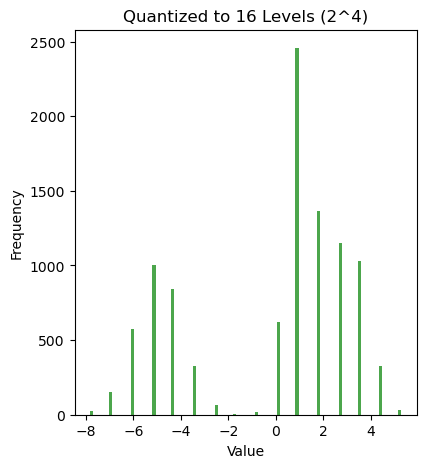

In [47]:
# 第一次量化
# quantized_data = quantize(data, b1)

quantized_data, dequantized_data = interval_based_quantize_dequantize(data, b1) # 使用基于区间的量化函数

# 第一次量化后的分布图
plt.figure(figsize=(15, 5))  # 画布总的大小
plt.subplot(1, 3, 2)
plt.hist(dequantized_data.numpy(), bins=100, color='green', alpha=0.7)
plt.title(f"Quantized to {b1} Levels (2^{n1})")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plt.xlim(-half_range(b1), half_range(b1))


In [48]:
start_time = time.time()  # 记录第二次量化的开始时间

In [49]:
# 第二次量化

# 进行动态量化级别缩减
#quantized_data_second, hist_data = dynamic_quantize_level_reduce(quantized_data, data, b2)


# 进行均匀量化（全是均匀量化版）
#quantized_data_second, hist_data = interval_based_quantize_eachprint(quantized_data, b2)
quantized_data_second, dequantized_data_second = interval_based_quantize_dequantize(dequantized_data, b2)


In [50]:
# 计算量化算法的最终损失（均方误差）
final_error_dynamic = ((dequantized_data_second - data) ** 2).sum().item()
num_samples = data.size(0)
mean_squared_error_dynamic = final_error_dynamic / num_samples


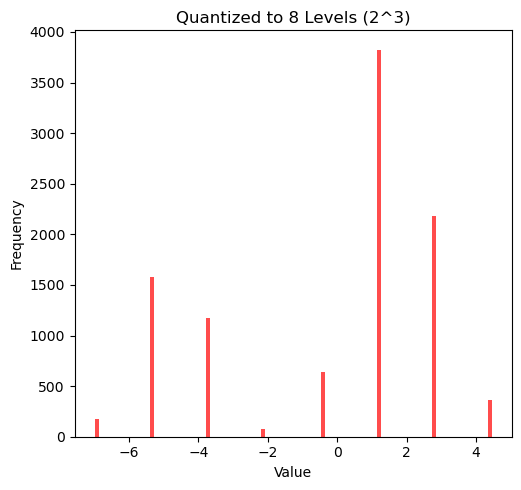

In [51]:
# 最终量化后分布图
plt.figure(figsize=(15, 5))  # 画布总的大小

plt.subplot(1, 3, 3)
plt.hist(dequantized_data_second.numpy(), bins=100, color='red', alpha=0.7)
plt.title(f"Quantized to {b2} Levels (2^{n2})")
plt.xlabel("Value")
plt.ylabel("Frequency")
# # X轴的范围是-((b1 - 1) / 2), (b1 - 1) / 2
# plt.xlim(-half_range_b2, half_range_b2)

plt.tight_layout()
plt.show()

In [52]:
# # 不对不对这个一步到位了，不用gif

# # 动画绘制
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.set_xlim(-half_range_b2, half_range_b2)
# ax.set_ylim(0, 5000)  # 设置适当的Y轴范围

# # 动画更新函数
# def update(frame):
#     ax.clear()
#     ax.hist(hist_data[frame], bins=100, color='red', alpha=0.7)
#     ax.set_title(f"Uniform Quantization Step: {frame + 1}")
#     ax.set_xlabel("Value")
#     ax.set_ylabel("Frequency")
#     ax.set_xlim(-half_range_b2, half_range_b2)
#     ax.set_ylim(0, 5000)  # 设置Y轴范围为0到5000

# # 创建动画
# ani = FuncAnimation(fig, update, frames=len(hist_data), repeat=False)

# # 保存为GIF文件
# ani.save('uniform_quantization_process.gif', writer='imagemagick', fps=1)

# # 显示生成的GIF文件路径
# print("GIF animation saved as 'uniform_quantization_process.gif'")

In [53]:
# 对比！
# ------------------------均匀量化--------------------------
# quantized_data_uniform = uniform_quantization(data, b2)
quantized_data_uniform, dequantized_data_uniform = interval_based_quantize_dequantize(data, b2) # 均匀量化
# quantized_data_uniform_mapped = map_to_target_range(quantized_data_uniform, 0, b1 - 1, -half_range_b2, half_range_b2)



# 计算均匀量化的最终损失（均方误差）
final_error_uniform_mapped = ((dequantized_data_uniform - data) ** 2).sum().item()
mean_squared_error_uniform_mapped = final_error_uniform_mapped / num_samples

# ------------------------均匀量化--------------------------

Text(0, 0.5, 'Frequency')

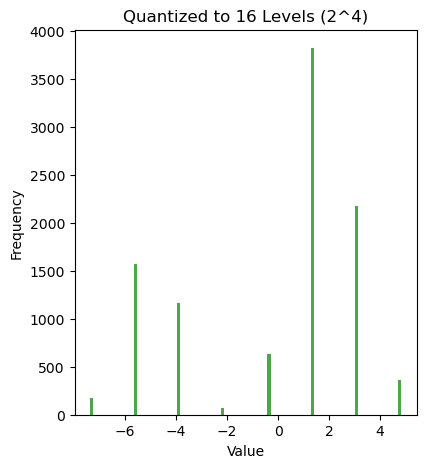

In [54]:
# 打印原数据直接全部均匀量化后的结果图
plt.figure(figsize=(15, 5))  # 画布总的大小
plt.subplot(1, 3, 2)
plt.hist(dequantized_data_uniform.numpy(), bins=100, color='green', alpha=0.7)
plt.title(f"Quantized to {b1} Levels (2^{n1})")
plt.xlabel("Value")
plt.ylabel("Frequency")


In [55]:
# 打印时间和最终均方误差
minimization_time = time.time() - start_time
print(f"Minimization to {b2} levels took {minimization_time:.4f} seconds.")
print(f"Final Mean Squared Error (本算法): {mean_squared_error_dynamic:.4f}")
print(f"Final Mean Squared Error (均匀): {mean_squared_error_uniform_mapped:.4f}")

Minimization to 8 levels took 0.4845 seconds.
Final Mean Squared Error (本算法): 0.2557
Final Mean Squared Error (均匀): 0.2465
